<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


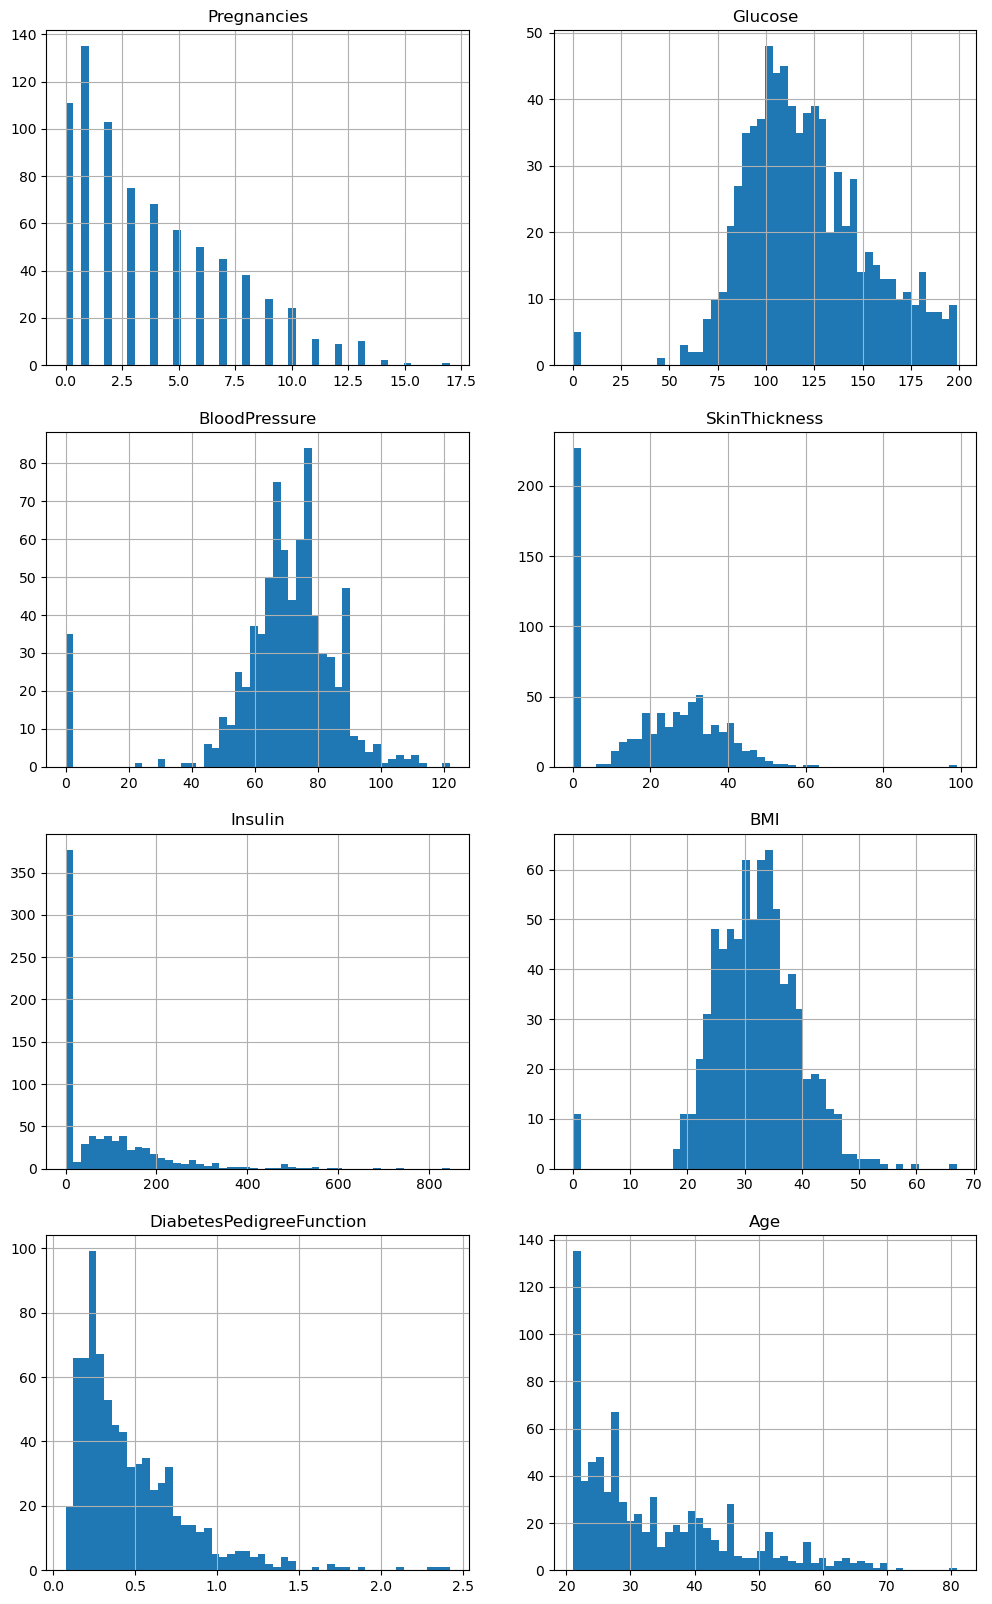

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

diabetes_df = pd.read_csv(r'C:\Users\kaviya\Downloads\Diabetes\diabetes.csv')
diabetes_df.info()


fig, axes_grid = plt.subplots(4, 2, figsize=(12, 20))

for row_idx in range(4):
    for col_idx in range(2):
        feature_index = row_idx * 2 + col_idx
        axes_grid[row_idx, col_idx].hist(diabetes_df.iloc[:, feature_index], bins=50)
        axes_grid[row_idx, col_idx].set_title(diabetes_df.columns[feature_index])
        axes_grid[row_idx, col_idx].grid(True)

plt.show()

In [2]:
# Checking for missing values in the dataset
missing_values = np.sum(diabetes_df.isna())
print(missing_values)

predictors = diabetes_df.drop('Outcome', axis=1)
labels = diabetes_df['Outcome']
# Checking the class distribution
label_distribution = labels.value_counts()
print(label_distribution)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Outcome
0    500
1    268
Name: count, dtype: int64



Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.93      0.77       100
           1       0.46      0.11      0.18        54

    accuracy                           0.64       154
   macro avg       0.56      0.52      0.48       154
weighted avg       0.59      0.64      0.56       154



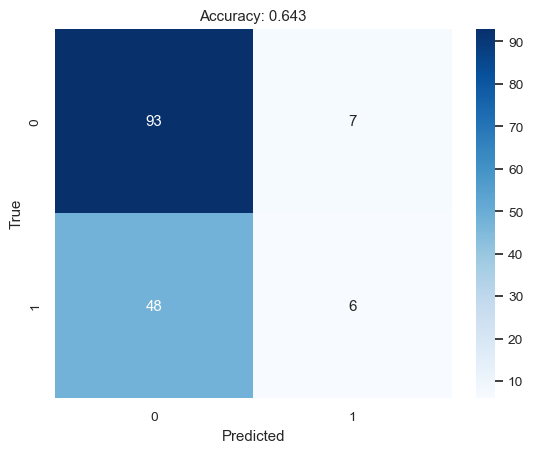


Perceptron Accuracy: 64.29%


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


def display_data_info(data):
    print("\nData Type Information:")
    data.info()


def load_data(file_path):
    """Loads the dataset and splits it into features (X) and target (y)."""
    data = pd.read_csv(file_path)
    X = data.iloc[:, :-1]  
    y = data.iloc[:, -1]   
    return X, y


def plot_confusion_matrix(y_true, y_pred):
    """Plots the confusion matrix as a heatmap and returns the accuracy score."""
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Accuracy: {accuracy:.3f}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    return accuracy

# Function to evaluate classifier performance
def evaluate_model(classifier, X_train, y_train, X_test, y_test):
    """Trains and evaluates the classifier using the test set."""
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = classifier.predict(X_test)
    
    # classification report 
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    accuracy = plot_confusion_matrix(y_test, y_pred)
    return accuracy


def main():

    X, y = load_data(r'C:\Users\kaviya\Downloads\Diabetes\diabetes.csv')  

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


    perceptron_classifier = Perceptron(random_state=524)

    
    perceptron_accuracy = evaluate_model(perceptron_classifier, X_train, y_train, X_test, y_test)
    print(f"\nPerceptron Accuracy: {perceptron_accuracy * 100:.2f}%")

# Entry point
if __name__ == "__main__":
    main()



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.62      0.72       100
           1       0.54      0.81      0.65        54

    accuracy                           0.69       154
   macro avg       0.70      0.72      0.68       154
weighted avg       0.75      0.69      0.70       154



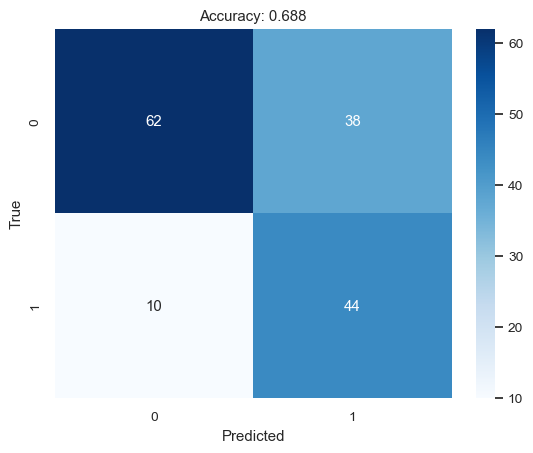


MLPClassifier Accuracy: 68.83%


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Function to display the confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    """Plots the confusion matrix as a heatmap and returns the accuracy score."""
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Accuracy: {accuracy:.3f}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    return accuracy


def evaluate_model(classifier, X_train, y_train, X_test, y_test):
    """Trains and evaluates the classifier using the test set."""
    
    classifier.fit(X_train, y_train)
    

    y_pred = classifier.predict(X_test)
    

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    accuracy = plot_confusion_matrix(y_test, y_pred)
    return accuracy

def main():
    
    file_path = r'C:\Users\kaviya\Downloads\Diabetes\diabetes.csv'  
    data = pd.read_csv(file_path)

  
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]

  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    
    mlp_classifier = MLPClassifier(random_state=524)

    
    mlp_accuracy = evaluate_model(mlp_classifier, X_train, y_train, X_test, y_test)
    print(f"\nMLPClassifier Accuracy: {mlp_accuracy * 100:.2f}%")

# Entry point
if __name__ == "__main__":
    main()


Column names in the dataset: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'HbA1c_level',
       'gender'],
      dtype='object')


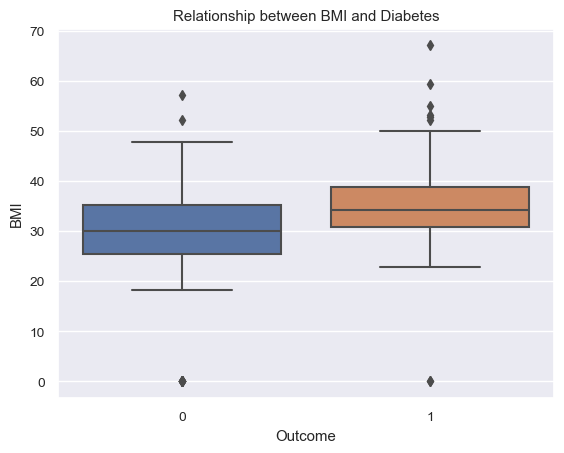

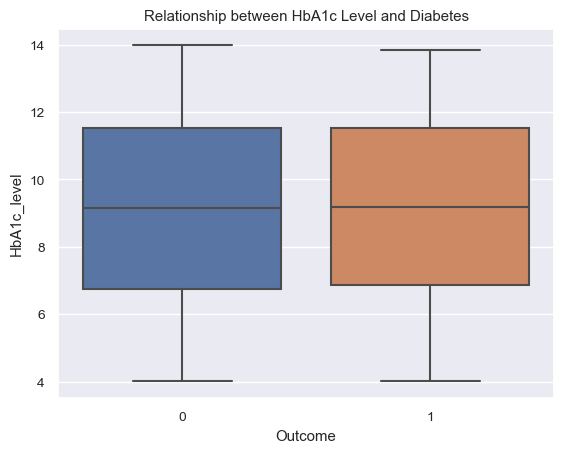

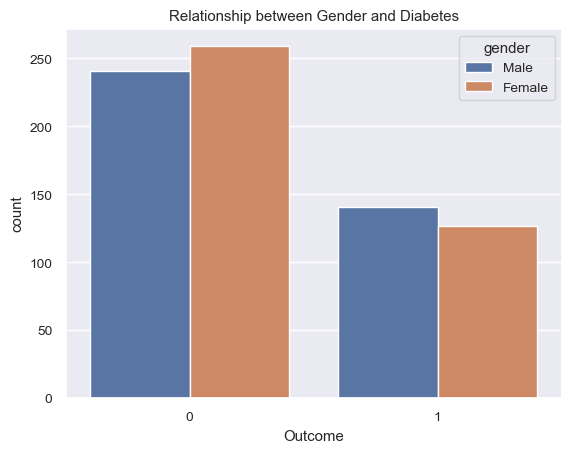

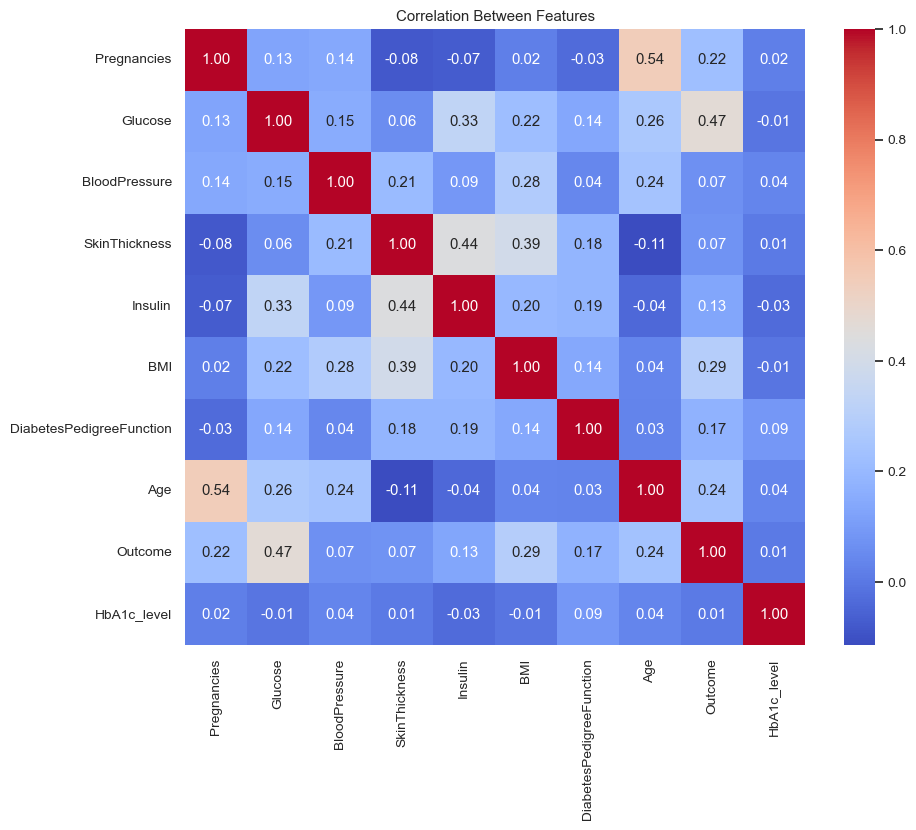

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv(r'C:\Users\kaviya\Downloads\Diabetes\diabetes.csv')


df['HbA1c_level'] = np.random.uniform(4, 14, size=len(df))  
df['gender'] = np.random.choice(['Male', 'Female'], size=len(df))  


print("Column names in the dataset:", df.columns)


sns.boxplot(data=df, x='Outcome', y='BMI')  
plt.title('Relationship between BMI and Diabetes')
plt.show()


sns.boxplot(data=df, x='Outcome', y='HbA1c_level')  
plt.title('Relationship between HbA1c Level and Diabetes')
plt.show()


sns.countplot(data=df, x='Outcome', hue='gender')  
plt.title('Relationship between Gender and Diabetes')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Features')
plt.show()


In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
import time
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import numpy as np

def train_and_evaluate_model(input_data, output_labels, learning_rate):
    """
    Function to train and evaluate a neural network model using cross-validation.
    
    Parameters:
    input_data (array-like): Features for training.
    output_labels (array-like): Target variable.
    learning_rate (float): Learning rate for the optimizer.
    
    Returns:
    mean_accuracy (float): Average accuracy from cross-validation.
    mean_auc (float): Average AUC from cross-validation.
    mean_runtime (float): Average runtime for model training.
    """
    
    n_splits = 5  
    stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []
    aucs = []
    runtimes = []
    
    fig, (ax_loss, ax_roc) = plt.subplots(1, 2, figsize=(12, 6))
    color_list = ['r', 'g', 'b', 'c', 'm'] 
    line_styles = ['-', '--', '-.', ':']
    def create_nn_model(input_shape):
        model = Sequential()
        model.add(Input(shape=input_shape)) 
        model.add(Dense(1, activation='sigmoid')) 
        optimizer = SGD(learning_rate=learning_rate)
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return model

    for fold_idx, (train_idx, test_idx) in enumerate(stratified_kfold.split(input_data, output_labels)): 
        X_train, X_test = input_data.iloc[train_idx], input_data.iloc[test_idx]
        y_train, y_test = output_labels.iloc[train_idx], output_labels.iloc[test_idx]

       
        standardizer = StandardScaler()
        X_train = standardizer.fit_transform(X_train)
        X_test = standardizer.transform(X_test)

        # Building and compiling the model
        nn_model = create_nn_model(X_train.shape[1:])

        
        early_stop = EarlyStopping(monitor='val_loss', patience=5)
        start_time = time.time()
        training_history = nn_model.fit(X_train, y_train, epochs=1000, batch_size=32, 
                                        validation_data=(X_test, y_test), callbacks=[early_stop], verbose=0)
        end_time = time.time()

        # predictions and calculating 
        y_pred_probabilities = nn_model.predict(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_pred_probabilities)
        auc_value = roc_auc_score(y_test, y_pred_probabilities)
        _, accuracy_value = nn_model.evaluate(X_test, y_test, verbose=0)

      
        accuracies.append(accuracy_value)
        aucs.append(auc_value)
        runtimes.append(end_time - start_time)
        # Plotting loss, accuracy, and ROC curves
        ax_loss.plot(training_history.history['loss'], linestyle=line_styles[0], color=color_list[fold_idx])
        ax_loss.plot(training_history.history['val_loss'], linestyle=line_styles[1], color=color_list[fold_idx])
        ax_loss.plot(training_history.history['accuracy'], linestyle=line_styles[2], color=color_list[fold_idx])
        ax_loss.plot(training_history.history['val_accuracy'], linestyle=line_styles[3], color=color_list[fold_idx])
        ax_roc.plot(fpr, tpr, linestyle='-', color=color_list[fold_idx])


    ax_loss.set_title('Loss and Accuracy Curves')
    ax_loss.set_xlabel('Epoch')
    ax_loss.set_ylabel('Loss / Accuracy')

    ax_roc.set_title('ROC Curves')
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')

    mean_accuracy = np.mean(accuracies)
    mean_auc = np.mean(aucs)
    mean_runtime = np.mean(runtimes)

    print(f"Average Accuracy: {mean_accuracy:.3f}")
    print(f"Average AUC: {mean_auc:.3f}")
    print(f"Average Runtime: {mean_runtime:.3f} seconds")

    return mean_accuracy, mean_auc, mean_runtime

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Average Accuracy: 0.747
Average AUC: 0.828
Average Runtime: 68.513 seconds
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Average Accuracy: 0.770
Average AUC: 0.829
Average Runtime: 56.755 seconds
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Average Accuracy: 0.767
Average AUC: 0.831
Average Runtime: 12.432 seconds
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Average Accurac

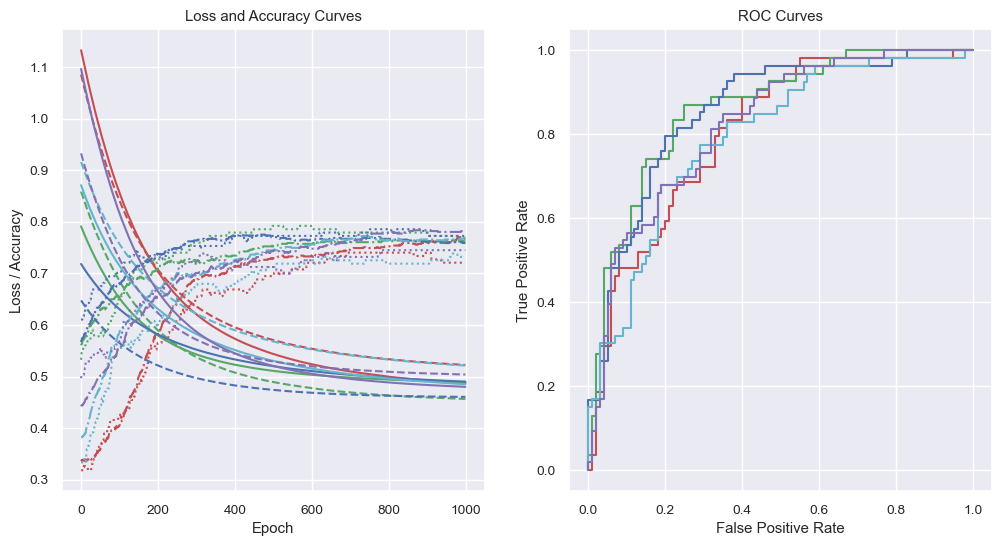

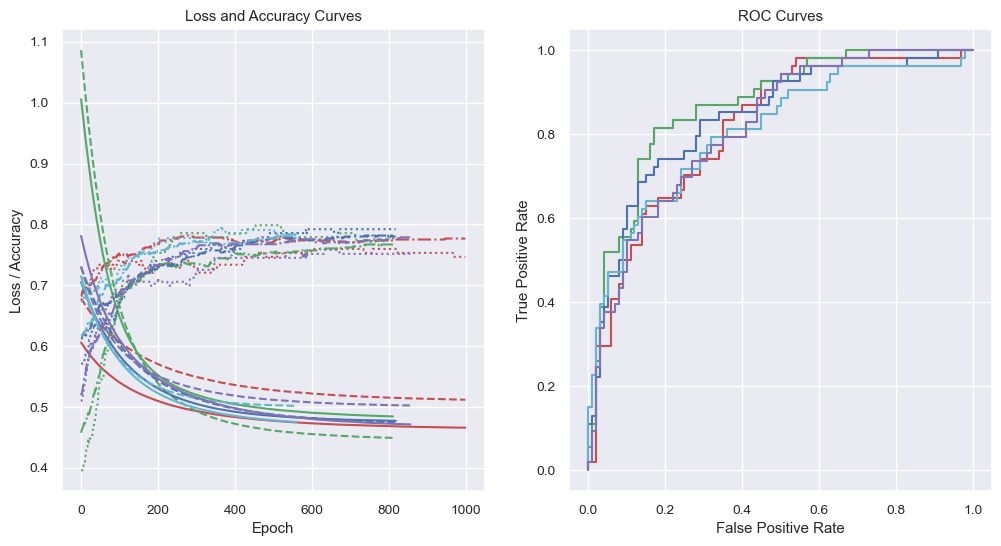

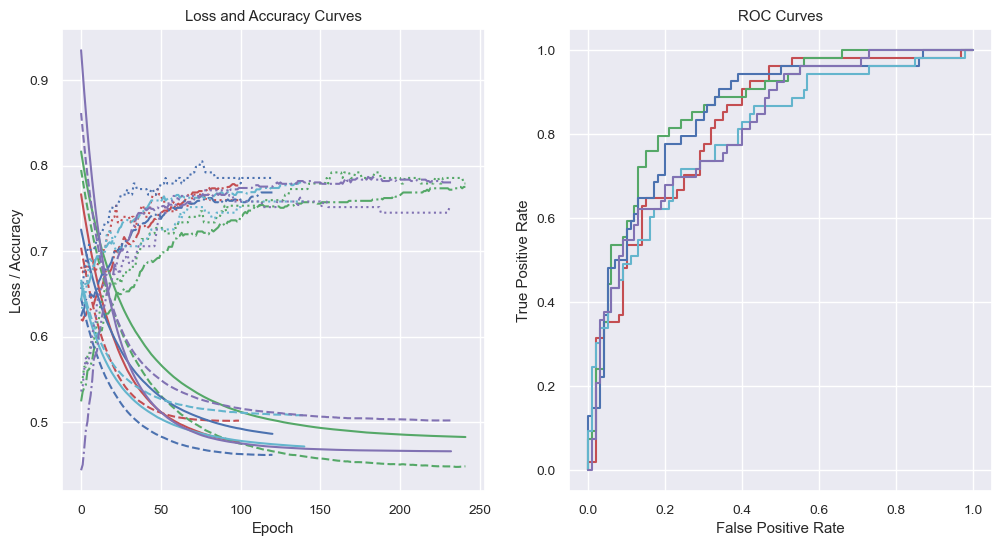

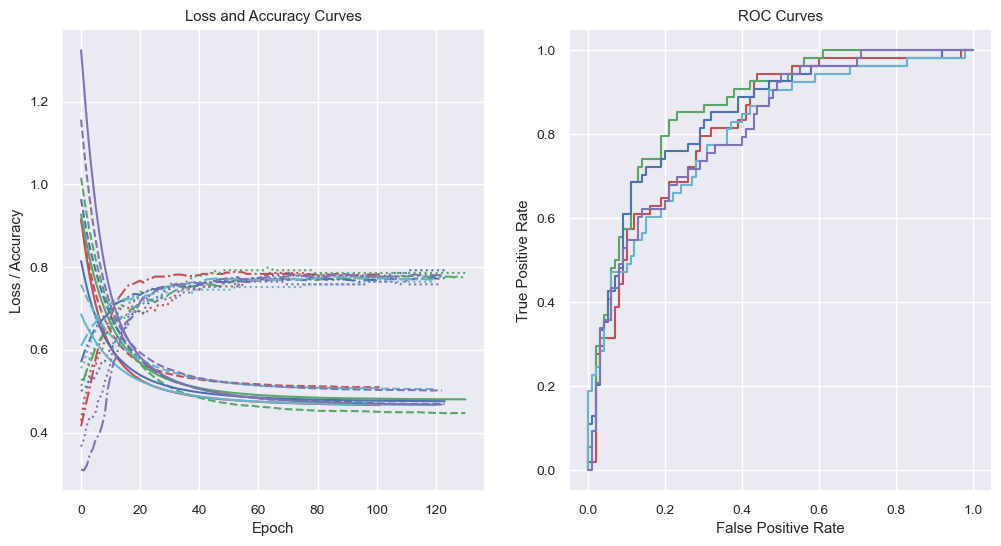

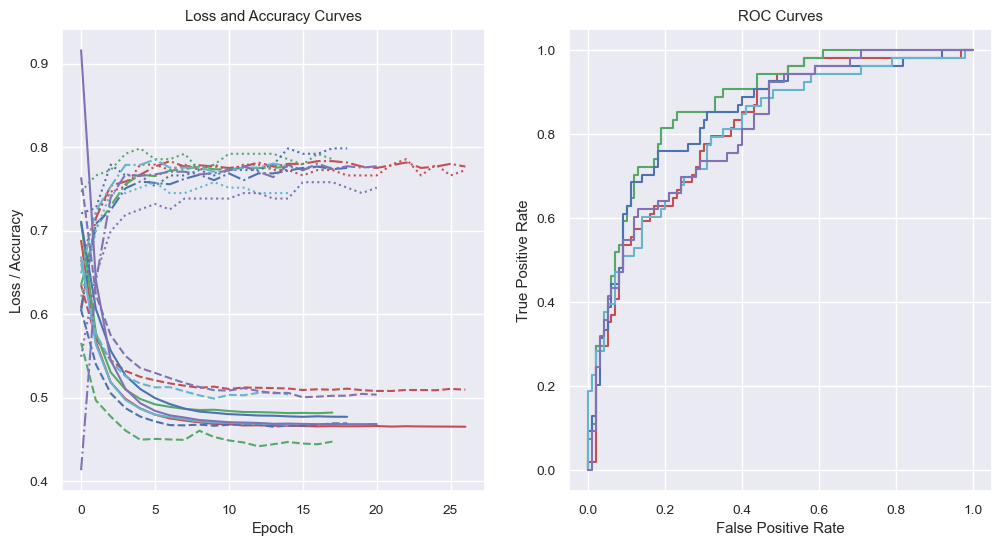

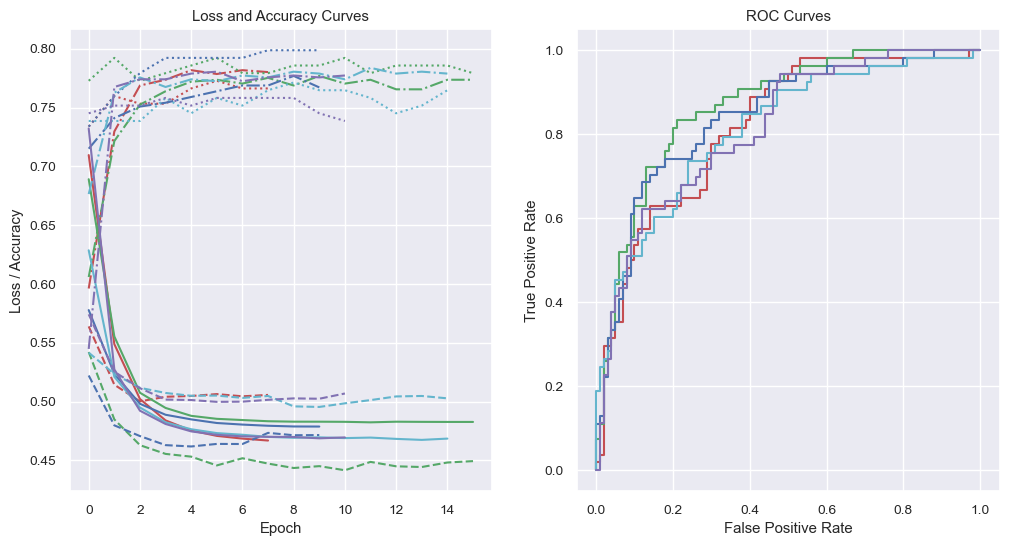

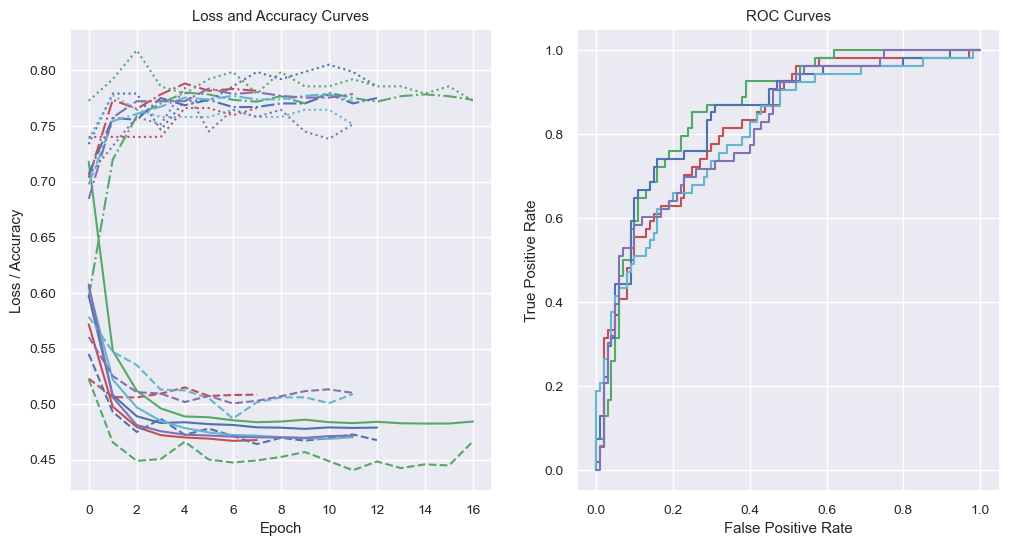

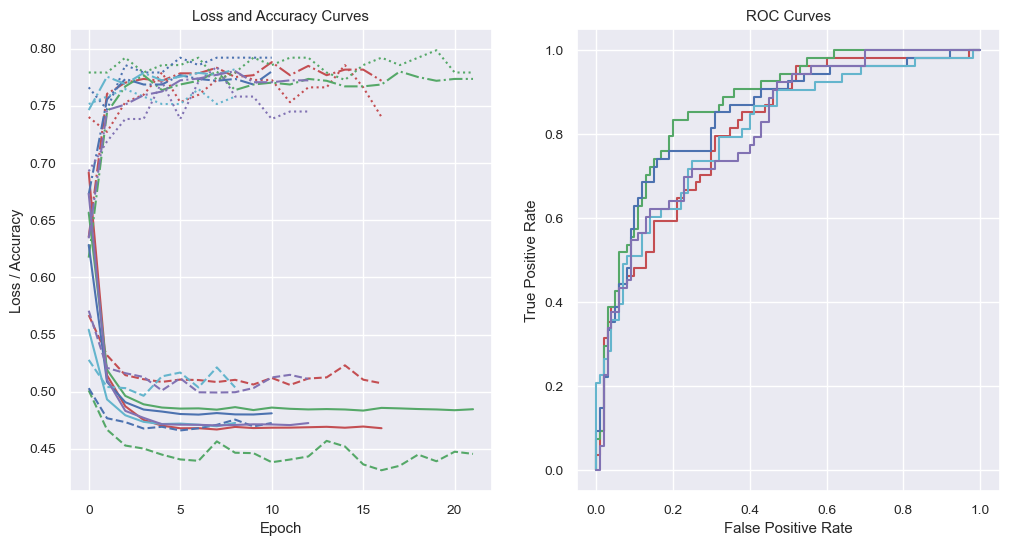

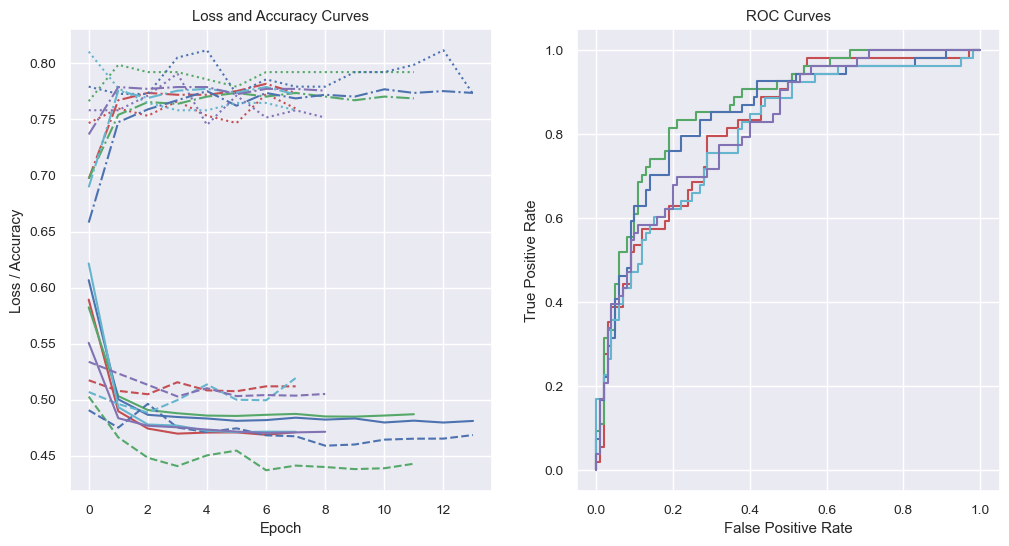

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=0.9)

lr_values = [0.0005, 0.001, 0.005, 0.01, 0.1, 0.15, 0.2, 0.25, 0.3] 

evaluation_results = {'learning_rate': [], 'mean_accuracy': [], 'mean_auc': [], 'mean_runtime': []}

# Train and evaluate the model 
for lr in lr_values:
    mean_acc, mean_auc, mean_runtime = train_and_evaluate_model(predictors, labels, lr)
    evaluation_results['learning_rate'].append(str(lr))
    evaluation_results['mean_accuracy'].append(mean_acc * 100)
    evaluation_results['mean_auc'].append(mean_auc)
    evaluation_results['mean_runtime'].append(mean_runtime)

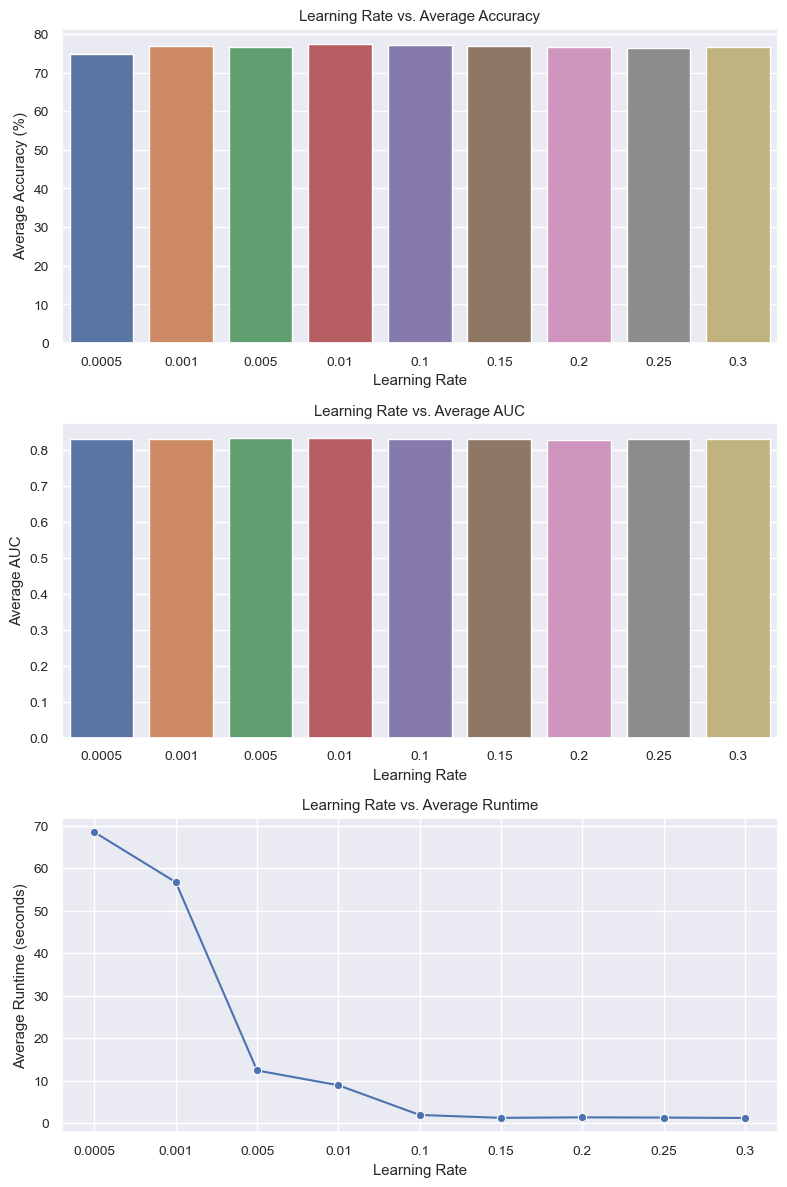

In [16]:
# Plotting the results for accuracy, AUC, and runtime
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plot average accuracy
sns.barplot(x='learning_rate', y='mean_accuracy', data=evaluation_results, ax=axes[0])
axes[0].set_title('Learning Rate vs. Average Accuracy')
axes[0].set_xlabel('Learning Rate')
axes[0].set_ylabel('Average Accuracy (%)')

# Plot average AUC
sns.barplot(x='learning_rate', y='mean_auc', data=evaluation_results, ax=axes[1])
axes[1].set_title('Learning Rate vs. Average AUC')
axes[1].set_xlabel('Learning Rate')
axes[1].set_ylabel('Average AUC')

# Plot execution time
sns.lineplot(x='learning_rate', y='mean_runtime', data=evaluation_results, marker='o', ax=axes[2])
axes[2].set_title('Learning Rate vs. Average Runtime')
axes[2].set_xlabel('Learning Rate')
axes[2].set_ylabel('Average Runtime (seconds)')

plt.tight_layout()
plt.show()
